# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the dataset

In [2]:
data=pd.read_csv('titanic_dataset (1).csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#making passengerid as index column
data=data.set_index('PassengerId')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Checking the basic details of the dataset

In [5]:
data.shape

(891, 11)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [7]:
data.describe(include = "all")

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [8]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [9]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [10]:
#filling missing values

In [11]:
data['Age']=data['Age'].fillna(data['Age'].median())

In [12]:
data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode()[0])

In [13]:
data['Cabin']=data['Cabin'].fillna(data['Cabin'].mode()[0])

In [14]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

# Exploratory Data Analysis(EDA)

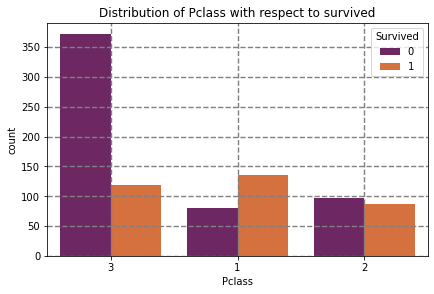

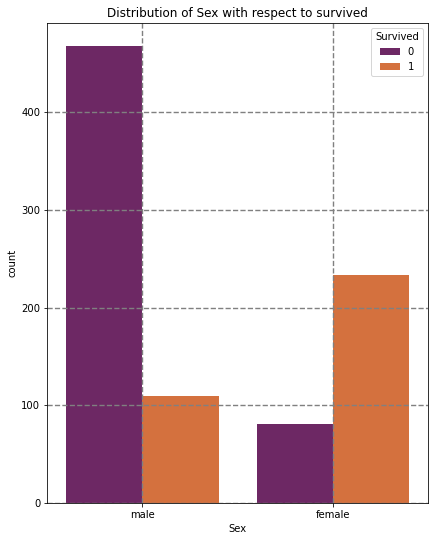

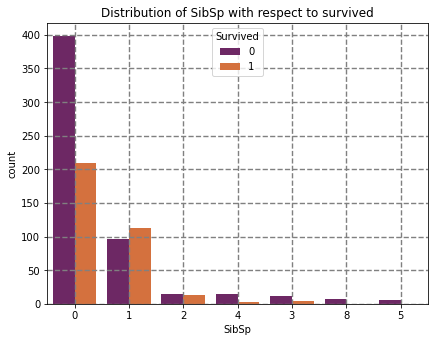

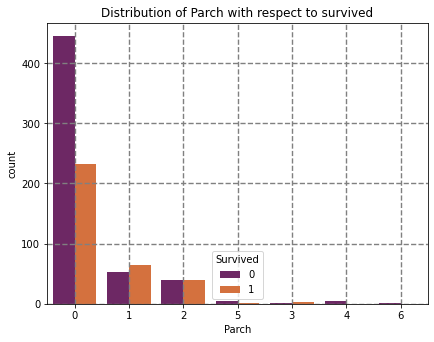

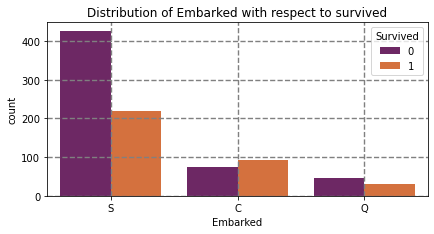

In [15]:
columns =["Pclass","Sex","SibSp","Parch","Embarked" ]
for i in columns:
    plt.figure(figsize=(15,30))
    plt.subplot(len(i), 2, 3)
    sns.countplot(x=data[i],order=data[i].value_counts().index,hue=data["Survived"],palette="inferno")
    plt.title('Distribution of {} with respect to survived'.format(i))
    plt.grid(color = "grey", linewidth = "1.4", linestyle = "--")
    plt.show() 


In [16]:
#Insights
#Third Class had the highest number of passengers. They had the least number of survivers.
#The percentage of female survivors was higher than the number of male survivors.
#The persons who travelled alone survived more compared to someone traveled with more than 2 siblings or spouse.
#The chances of survival dropped drastically if someone traveled with parent or child.
#People who boarded from Cherbourg had a higher chance of survival than people who boarded from Southampton or Queenstown.

<AxesSubplot:>

<Figure size 2160x1296 with 0 Axes>

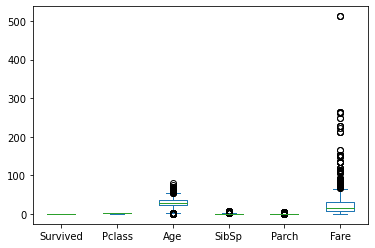

In [17]:
#checking for outliers
plt.figure(figsize=(30,18))
data.plot(kind='box', vert=True)

<AxesSubplot:ylabel='Age'>

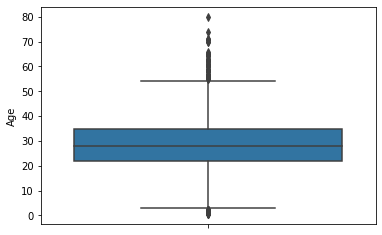

In [18]:
sns.boxplot(y=data["Age"])

In [19]:
Q1 = np.percentile(data['Age'],25,interpolation = 'midpoint')
Q2 = np.percentile(data['Age'],50,interpolation = 'midpoint')
Q3 = np.percentile(data['Age'],75,interpolation = 'midpoint')

IQR = Q3-Q1
lower_limit = Q1 - (1.5*IQR)
upper_limit = Q3 + (1.5*IQR)

print("IQR is ",IQR)
print("Lower limit is" ,lower_limit)
print("Upper Limit is",upper_limit)


IQR is  13.0
Lower limit is 2.5
Upper Limit is 54.5


<AxesSubplot:ylabel='Age'>

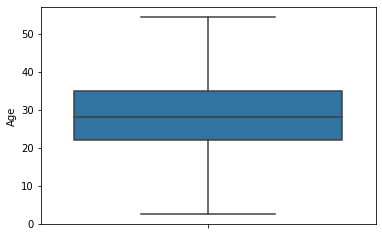

In [20]:
data['Age']=np.where(data['Age']>upper_limit,upper_limit,np.where(data['Age']<lower_limit,lower_limit,data['Age']))
sns.boxplot(y=data["Age"])

<AxesSubplot:ylabel='SibSp'>

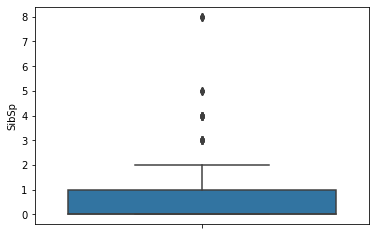

In [21]:
sns.boxplot(y=data["SibSp"])

In [22]:
Q1 = np.percentile(data['SibSp'],25,interpolation = 'midpoint')
Q2 = np.percentile(data['SibSp'],50,interpolation = 'midpoint')
Q3 = np.percentile(data['SibSp'],75,interpolation = 'midpoint')

IQR = Q3-Q1
lower_limit = Q1 - (1.5*IQR)
upper_limit = Q3 + (1.5*IQR)

print("IQR is ",IQR)
print("Lower limit is" ,lower_limit)
print("Upper Limit is",upper_limit)

IQR is  1.0
Lower limit is -1.5
Upper Limit is 2.5


<AxesSubplot:ylabel='SibSp'>

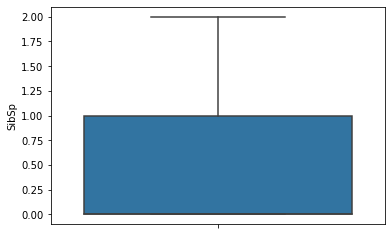

In [23]:
index=data['SibSp'][(data['SibSp']>upper_limit)|(data['SibSp']<lower_limit)].index
data.drop(index,inplace=True)
sns.boxplot(y=data["SibSp"])

<AxesSubplot:ylabel='Fare'>

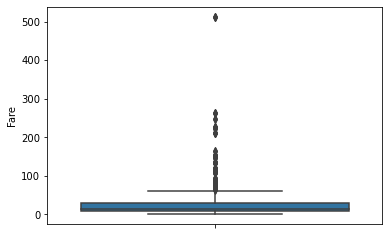

In [24]:
sns.boxplot(y=data["Fare"])

In [25]:
Q1 = data['Fare'].quantile(0.25)
Q3 = data['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - (1.5*IQR)
upper_limit = Q3 + (1.5*IQR)

print("IQR is ",IQR)
print("Lower limit is" ,lower_limit)
print("Upper Limit is",upper_limit)

IQR is  22.1042
Lower limit is -25.2605
Upper Limit is 63.1563


<AxesSubplot:ylabel='Fare'>

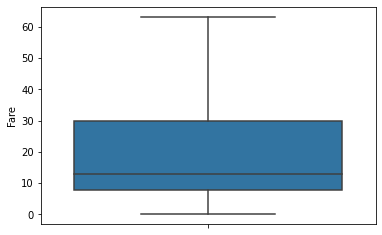

In [26]:
data['Fare']=np.where(data['Fare']>upper_limit,upper_limit,np.where(data['Fare']<lower_limit,lower_limit,data['Fare']))
sns.boxplot(y=data["Fare"])

# Feature engineering

In [27]:
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
import re
# Define function to extract titles from passenger names
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""
# Create a new feature Title, containing the titles of passenger names
data['Title'] = data['Name'].apply(get_title)
data['Title'].unique()

# Group all non-common titles into one single grouping "Rare"
data['Title'] = data['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 
                                                 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
data['Title'] = data['Title'].replace('Mlle', 'Miss')
data['Title'] = data['Title'].replace('Ms', 'Miss')
data['Title'] = data['Title'].replace('Mme', 'Mrs')
#create bin for age features
data['Age_bin'] = pd.cut(data['Age'], bins=[0,12,20,40,120], labels=['Children','Teenage','Adult','Elder'])
## create bin for fare features
data['Fare_bin'] = pd.cut(data['Fare'], bins=[0,7.91,14.45,32,120], labels=['Low_fare','median_fare',
                                                                                      'Average_fare','high_fare'])
drop_column = ['Age','Fare','Name','Ticket']
data.drop(drop_column, axis=1, inplace = True)
data.head()

,Survived,Pclass,Sex,SibSp,Parch,Cabin,Embarked,FamilySize,Title,Age_bin,Fare_bin
PassengerId,,,,,,,,,,,
1,0,3,male,1,0,B96 B98,S,2,Mr,Adult,Low_fare
2,1,1,female,1,0,C85,C,2,Mrs,Adult,high_fare
3,1,3,female,0,0,B96 B98,S,1,Miss,Adult,median_fare
4,1,1,female,1,0,C123,S,2,Mrs,Adult,high_fare
5,0,3,male,0,0,B96 B98,S,1,Mr,Adult,median_fare


# Encoding

In [28]:
data = pd.get_dummies(data, columns = ['Sex','Title','Age_bin','Embarked','Fare_bin'],
                             prefix=['Sex','Title','Age_type','Em_type','Fare_type'])

In [29]:
data.shape

(845, 24)

# Feature Reduction

In [30]:
data = data.drop(['Cabin'],axis = 1) # No useful info; so dropping cabin

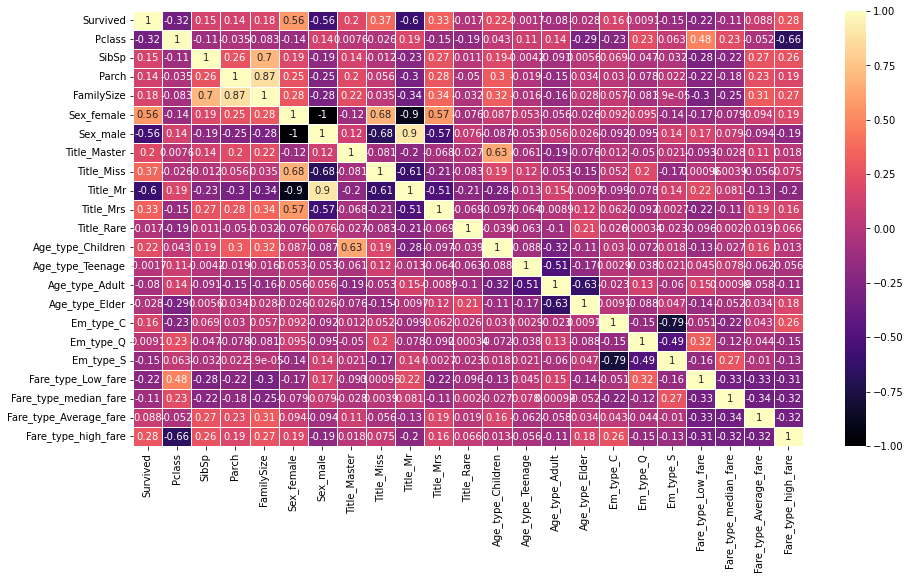

In [31]:
plt.figure(figsize=(15,8))
sns.heatmap(data=data.corr(), annot=True, linewidths=.5, cmap="magma")
plt.show()

In [32]:
#From the above , we can see that sex has high correlation with survived 
X=data.drop(['Survived'],axis=1)
y=data['Survived']

In [33]:
X.describe()

,Pclass,SibSp,Parch,FamilySize,Sex_female,Sex_male,Title_Master,Title_Miss,Title_Mr,Title_Mrs,...,Age_type_Teenage,Age_type_Adult,Age_type_Elder,Em_type_C,Em_type_Q,Em_type_S,Fare_type_Low_fare,Fare_type_median_fare,Fare_type_Average_fare,Fare_type_high_fare
count,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.00000,845.000000,...,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000
mean,2.279290,0.313609,0.317160,1.630769,0.346746,0.653254,0.026036,0.196450,0.60355,0.146746,...,0.123077,0.647337,0.177515,0.198817,0.086391,0.714793,0.246154,0.255621,0.254438,0.226036
std,0.840396,0.530909,0.765829,1.038820,0.476216,0.476216,0.159335,0.397548,0.48945,0.354062,...,0.328720,0.478082,0.382330,0.399346,0.281106,0.451780,0.431024,0.436468,0.435803,0.418510
min,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.00000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.00000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,3.000000,2.000000,6.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Feature Scaling

In [34]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range =(0, 1)) 
X = min_max_scaler.fit_transform(X)
#X = pd.DataFrame(X)

# Modelling

In [35]:
#Splitting the dataset into train and validation test
from sklearn.model_selection import train_test_split,GridSearchCV
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size = 0.3)
print(X_test)

[[1.         0.         0.         ... 0.         0.         0.        ]
 [0.5        0.5        0.         ... 0.         1.         0.        ]
 [1.         0.5        0.16666667 ... 0.         1.         0.        ]
 ...
 [1.         0.         0.         ... 1.         0.         0.        ]
 [1.         0.         0.         ... 0.         0.         0.        ]
 [0.5        1.         0.16666667 ... 0.         0.         1.        ]]


In [36]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1])

In [37]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
accuracy_score(y_test,y_pred)

0.7716535433070866

In [38]:
from sklearn.naive_bayes import BernoulliNB
classifier=BernoulliNB()
classifier.fit(X_train,y_train)
BernoulliNB()
y_pred=classifier.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1])

In [39]:
cm=confusion_matrix(y_test,y_pred)
accuracy_score(y_test,y_pred)

0.8661417322834646